In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, root_mean_squared_error

In [2]:
dataset = load_diabetes()
X = dataset.data
y = dataset.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

R2 Score: 0.439933866156897
RMSE Score: 55.62784079546915


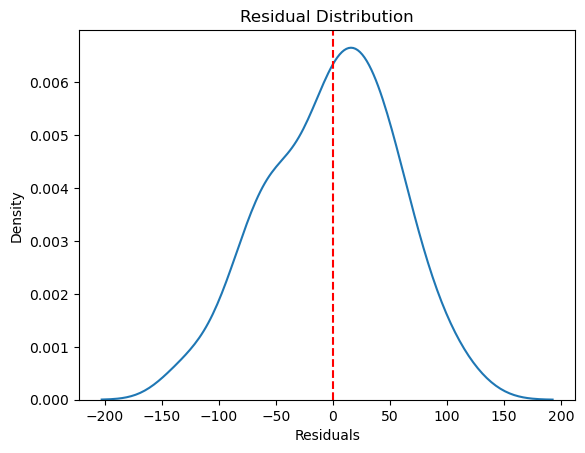

In [5]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_hat = linear_regressor.predict(X_test)
print(f"R2 Score: {r2_score(y_test,y_hat)}")
print(f"RMSE Score: {root_mean_squared_error(y_test,y_hat)}")

sns.kdeplot(y_hat - y_test)
plt.axvline(0, linestyle='--', color='red')
plt.xlabel('Residuals')
plt.title('Residual Distribution')
plt.show()

In [6]:
ridge_regressor = Ridge()

param_grid = {'alpha': np.logspace(-4, 4, 50)}
grid_search = GridSearchCV(estimator=ridge_regressor, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

best_ridge_regressor = Ridge(alpha=best_alpha)
best_ridge_regressor.fit(X_train, y_train)
y_hat = best_ridge_regressor.predict(X_test)
print(f"R2 Score: {r2_score(y_test,y_hat)}")
print(f"RMSE Score: {root_mean_squared_error(y_test,y_hat)}")

R2 Score: 0.4430305341400611
RMSE Score: 55.47384136915601


In [7]:
lasso_regressor = Lasso()

param_grid = {'alpha': np.logspace(-4, 4, 50)}
grid_search = GridSearchCV(estimator=lasso_regressor, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_lasso_regressor = grid_search.best_estimator_

y_hat = best_lasso_regressor.predict(X_test)
print(f"R2 Score: {r2_score(y_test,y_hat)}")
print(f"RMSE Score: {root_mean_squared_error(y_test,y_hat)}")

R2 Score: 0.4387627842324947
RMSE Score: 55.68596852050392


In [15]:
elastic_net_regressor = ElasticNet()

param_grid = {
    'alpha': np.logspace(-4, 4, 50)
}

grid_search = GridSearchCV(estimator=elastic_net_regressor, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

best_elastic_net_regressor = ElasticNet(alpha=best_alpha, l1_ratio=0.1) # 10% Lasso
best_elastic_net_regressor.fit(X_train, y_train)
y_hat = best_elastic_net_regressor.predict(X_test)
print(f"R2 Score: {r2_score(y_test,y_hat)}")
print(f"RMSE Score: {root_mean_squared_error(y_test,y_hat)}")

R2 Score: 0.4438920492212549
RMSE Score: 55.430921560200574
